In [24]:
pip install pyspark

In [25]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Big Data Analysis - College Data") \
    .getOrCreate()

In [27]:
df = spark.read.csv("/content/drive/MyDrive/task data set/College.csv", header=True, inferSchema=True)

# Show first few rows
df.show(5)

+--------------------+-------+----+------+------+---------+---------+-----------+-----------+--------+----------+-----+--------+---+--------+---------+-----------+------+---------+
|                 _c0|Private|Apps|Accept|Enroll|Top10perc|Top25perc|F.Undergrad|P.Undergrad|Outstate|Room.Board|Books|Personal|PhD|Terminal|S.F.Ratio|perc.alumni|Expend|Grad.Rate|
+--------------------+-------+----+------+------+---------+---------+-----------+-----------+--------+----------+-----+--------+---+--------+---------+-----------+------+---------+
|Abilene Christian...|    Yes|1660|  1232|   721|       23|       52|       2885|        537|    7440|      3300|  450|    2200| 70|      78|     18.1|         12|  7041|       60|
|  Adelphi University|    Yes|2186|  1924|   512|       16|       29|       2683|       1227|   12280|      6450|  750|    1500| 29|      30|     12.2|         16| 10527|       56|
|      Adrian College|    Yes|1428|  1097|   336|       22|       50|       1036|         99|  

In [39]:
df.printSchema()

# Count rows
print("Total Records:", df.count())

root
 |-- _c0: string (nullable = true)
 |-- Private: string (nullable = true)
 |-- Apps: integer (nullable = true)
 |-- Accept: integer (nullable = true)
 |-- Enroll: integer (nullable = true)
 |-- Top10perc: integer (nullable = true)
 |-- Top25perc: integer (nullable = true)
 |-- F_Undergrad: integer (nullable = true)
 |-- P_Undergrad: integer (nullable = true)
 |-- Outstate: integer (nullable = true)
 |-- Room_Board: integer (nullable = true)
 |-- Books: integer (nullable = true)
 |-- Personal: integer (nullable = true)
 |-- PhD: integer (nullable = true)
 |-- Terminal: integer (nullable = true)
 |-- S_F_Ratio: double (nullable = true)
 |-- perc_alumni: integer (nullable = true)
 |-- Expend: integer (nullable = true)
 |-- Grad_Rate: integer (nullable = true)
 |-- Private_Binary: integer (nullable = false)

Total Records: 777


In [31]:
from pyspark.sql.functions import col

# Rename columns with periods
df = df.withColumnRenamed("F.Undergrad", "F_Undergrad") \
       .withColumnRenamed("P.Undergrad", "P_Undergrad") \
       .withColumnRenamed("Room.Board", "Room_Board") \
       .withColumnRenamed("S.F.Ratio", "S_F_Ratio") \
       .withColumnRenamed("perc.alumni", "perc_alumni") \
       .withColumnRenamed("Grad.Rate", "Grad_Rate")

# Now apply dropna and dropDuplicates
df = df.dropna()

# Remove duplicates
df = df.dropDuplicates()

In [32]:
from pyspark.sql.functions import col, when

# Example: Convert 'Private' column to binary
df = df.withColumn("Private_Binary", when(col("Private") == "Yes", 1).otherwise(0))

In [33]:
df.groupBy("Private").avg("Outstate").show()

+-------+------------------+
|Private|     avg(Outstate)|
+-------+------------------+
|     No|  6813.41037735849|
|    Yes|11801.693805309735|
+-------+------------------+



In [34]:
df.select("Apps", "Accept").summary("mean", "stddev", "min", "max").show()

+-------+------------------+------------------+
|summary|              Apps|            Accept|
+-------+------------------+------------------+
|   mean|3001.6383526383524|2018.8043758043757|
| stddev|3870.2014844352884|2451.1139709926306|
|    min|                81|                72|
|    max|             48094|             26330|
+-------+------------------+------------------+



In [36]:
df.orderBy(col("Grad_Rate").desc()).select("_c0", "Grad_Rate").show(10)

+--------------------+---------+
|                 _c0|Grad_Rate|
+--------------------+---------+
|   Cazenovia College|      118|
|University of Ric...|      100|
|  Lindenwood College|      100|
|  Harvard University|      100|
|       Siena College|      100|
|     Amherst College|      100|
|Santa Clara Unive...|      100|
| Harvey Mudd College|      100|
|College of Mount ...|      100|
|Missouri Southern...|      100|
+--------------------+---------+
only showing top 10 rows



In [37]:
print("Number of partitions:", df.rdd.getNumPartitions())

# Repartition if needed (e.g., for distributed performance)
df = df.repartition(4)

Number of partitions: 1


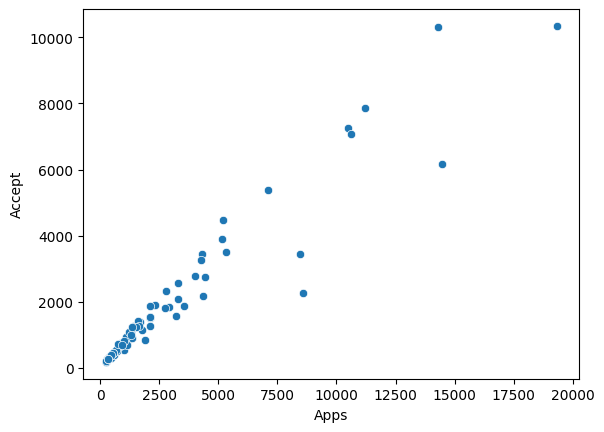

In [38]:
sample_df = df.sample(fraction=0.1).toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Apps', y='Accept', data=sample_df)
plt.show()